<IPython.core.display.Javascript object>


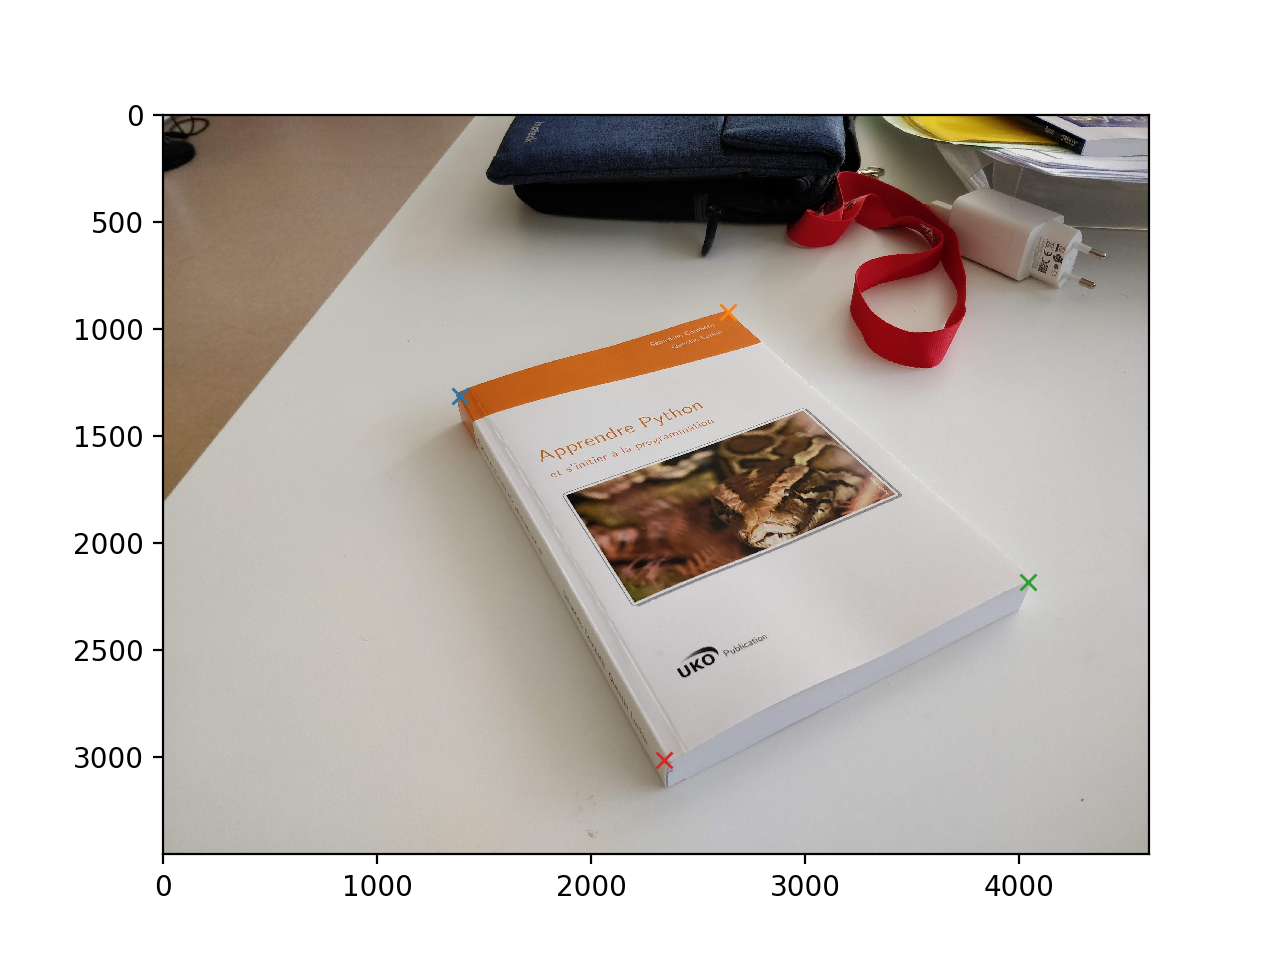

In [2]:
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
import math
import matplotlib.image as mpimg
# pour rendre matplotlib interactif dans Jupyter et utiliser la souris
%matplotlib notebook
# Chargement de l'image
img = mpimg.imread('Couverture.jpg')
fig = plt.figure()
points = [[], []]
# fonction appelée à chaque click sur l'image
def onclick(event):
    # sauve le point
    points[0].append(event.xdata)
    points[1].append(event.ydata)
    # affiche une croix
    plt.plot([event.xdata], [event.ydata], "x")
    
# enregistrement de la fonction comme évenement
fig.canvas.mpl_connect('button_press_event', onclick)
# affichage de l'image
plt.imshow(img)
plt.show()

#%
    

In [5]:
%matplotlib inline
def createMatriceWorld(image,world):
    x1i = image[0][0]
    y1i = image[1][0]
    
    x2i = image[0][1]
    y2i = image[1][1]
    
    x3i = image[0][2]
    y3i = image[1][2]
    
    x4i = image[0][3]
    y4i = image[1][3]
    
    x1w = world[0][0]
    y1w = world[1][0]
    
    x2w = world[0][1]
    y2w = world[1][1]
    
    x3w = world[0][2]
    y3w = world[1][2]
    
    x4w = world[0][3]
    y4w = world[1][3]
    
    a = [x1w, y1w, 1, 0, 0, 0, -x1i * x1w, -x1i * y1w]
    b = [0, 0, 0, x1w, y1w, 1, -y1i * x1w,-y1i * y1w]
    c = [x2w, y2w, 1, 0, 0, 0, -x2i * x2w, -x2i * y2w]
    d = [0, 0, 0, x2w, y2w, 1, -y2i * x2w,-y2i * y2w]
    e = [x3w, y3w, 1, 0, 0, 0, -x3i * x3w, -x3i * y3w]
    f = [0, 0, 0, x3w, y3w, 1, -y3i * x3w,-y3i * y3w]
    g = [x4w, y4w, 1, 0, 0, 0, -x4i * x4w, -x4i * y4w]
    h = [0, 0, 0, x4w, y4w, 1, -y4i * x4w,-y4i * y4w]
    
    matrix = np.array([a,b,c,d,e,f,g,h])
    matImage = np.array([x1i,y1i,x2i,y2i,x3i,y3i,x4i,y4i])
    return np.linalg.inv(matrix) @ matImage

print(points)

world = np.array([
    [0,2099,2099,0],
    [0,0,2899,2899]
])

monde = createMatriceWorld(points,world)
print(monde)

[[1388.7435064935064, 2641.7305194805194, 4044.3279220779223, 2342.5097402597403], [1314.3766233766232, 921.6493506493503, 2183.987012987013, 3016.194805194805]]
[ 7.39064483e-01  4.06863963e-02  1.38874351e+03 -1.37519218e-01
  2.15808355e-01  1.31437662e+03  5.37979709e-05 -1.23078233e-04]


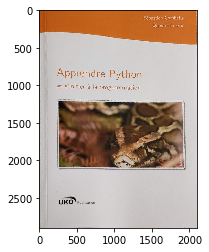

In [6]:
def rewriteMatrix(m):
    x = [m[0], m[1], m[2]]
    y = [m[3], m[4], m[5]]
    z = [m[6], m[7], 1]
    matrix = np.array([x, y, z])
    return matrix

newMatrix = rewriteMatrix(monde)
finalImg = []

for i in range(0, 2899):
    finalImg.append([])
    for j in range(0, 2099):
        coord = np.array([j, i, 1])
        coordImage = newMatrix @ coord
        normCoordImage = coordImage / coordImage[2]
        color = img[int(normCoordImage[1])][int(normCoordImage[0])]
        finalImg[i].append(color)
        
plt.imshow(finalImg)
plt.show()